# Исследование надежности заемщиков


Цель данного исследования- на основе данных кредитного отдела банка исследовать влияние различных характеристик заемщиков на погашение кредита в срок.
На первом этапе выполним обзор и предобработку данных.
На втором проверим, есть ли зависимость между семейным положением, количеством детей, уровнем дохода и целью кредита на выплату кредита в срок.
(Проект учебный и не содержит проверки статистических гипотез).

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
AutoMinorLocator)



In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Данный фатасет содержит 11 столбцов и включает в себя данные о таких характеристиках заемщика как:количество детей, возраст, образование, семейное положение, пол, рабочий статус и стаж, цель кредита. Есть информация о более чем 21000 заемщиков.

## Предобработка данных

Далее необходимо выполнить предобработку данных: обработать пропуски, удалить дубликаты, аномальные значения.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Заполним пропуски в столбце с данными о доходах медианными значениями по каждому типу дохода из столбца 'income_type'. 

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

Обработаем данные в столбце с трудовым стажем: заменим все отрицательные значения на модуль этих значений.

In [7]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа.

In [8]:
grouped=data.groupby('income_type')['days_employed'].median()
print(grouped)


income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Данные о рабочем стаже нам не нужны в исследовании, поэтому оставим их без изменений.

Удалим аномальные значения из столбца с количеством детей.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [10]:
data=data.loc[(data['children']!=-1)&(data['children']!=20)]

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Заполним пропуски в столбце со стажем медианными значениями по каждому типу занятости.

In [31]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Все пропуски заполнены.

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Изменим вещественный тип данных в столбце 'total_income' на целочисленный.

In [14]:
data['total_income']=data['total_income'].astype(int)

<ipython-input-14-38ef34bf3b17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income']=data['total_income'].astype(int)


Удалим явные и неявные дубликаты.

In [15]:
data.duplicated().sum()

54

In [16]:
data=data.drop_duplicates().reset_index(drop=True) 

In [17]:
data['education']=data['education'].str.lower()

### Категоризация данных

Для дальнейшего анализа данных создадим столбец с различными категориями доходов.

In [18]:
def categorize_income(row):
    income=row['total_income']
    if income<=30000:
        return 'E'
    if 30001<=income<=50000:
        return 'D'
    if 50001<=income<=200000:
        return 'C'
    if 200001<=income<=1000000:
        return 'B'
    return 'A'

# создаем функцию categorize_income()

In [19]:
data['total_income_category']=data.apply(categorize_income, axis=1) # применяем функцию методом apply()

Также создадим несколько категорий целей кредита. Отнесем каждую заявку к той или иной категории.

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [21]:
def categorize_purpose(row):
    purpose=row['purpose']
    if purpose== 'приобретение автомобиля'or purpose=='на покупку подержанного автомобиля'or purpose=='на покупку своего автомобиля'or purpose=='автомобили'or purpose=='сделка с подержанным автомобилем'or purpose=='автомобиль'or purpose=='свой автомобиль'or purpose=='сделка с автомобилем'or purpose=='на покупку автомобиля':
        return 'операции с автомобилем'
    if purpose=='покупка жилья'or  purpose=='операции с жильем'or purpose=='покупка жилья для семьи'or purpose=='покупка недвижимости'or purpose=='покупка коммерческой недвижимости' or purpose=='покупка жилой недвижимости'or purpose=='строительство собственной недвижимости'or purpose=='недвижимость'or purpose=='строительство недвижимости'or  purpose=='строительство жилой недвижимости'or purpose=='жилье'or purpose=='операции со своей недвижимостью'or  purpose=='покупка своего жилья'or purpose=='операции с недвижимостью'or\
    purpose=='покупка жилья для сдачи'or  purpose=='ремонт жилью'or purpose=='операции с коммерческой недвижимостью':
        return 'операции с недвижимостью'
    if purpose== 'сыграть свадьбу' or purpose=='на проведение свадьбы' or purpose=='свадьба':
        return 'проведение свадьбы'
    if purpose== 'дополнительное образование'or  purpose=='образование' or purpose=='получение образования'or purpose=='получение дополнительного образования'or purpose=='получение высшего образования'or purpose=='профильное образование'or purpose=='высшее образование'or purpose=='заняться высшим образованием'or purpose=='заняться образованием':
        return 'получение образования'
    # создадим функцию categorize_purpose()

In [22]:
data['purpose_category']=data.apply(categorize_purpose, axis=1)# применим функцию методом apply()

## Исследование зависимости семейного положения и количества детей на возврат кредита в срок




Определим есть ли зависимость между количеством детей и возвратом кредита в срок.

In [23]:
#создадим сводную таблицу,где первый столбец-количество людей с определенным количеством детей, второй-количество людей, ранее 
#ранее имеющих задолженность по кредиту, а в третьем рассчитаем процент в каждой группе
data_grouped = data.groupby(['children']).agg({'children':'count','debt':'sum'})
data_grouped['percent'] = round(data_grouped['debt'] / data_grouped['children']*100,1)
print(data_grouped)

          children  debt  percent
children                         
0            14107  1063      7.5
1             4809   444      9.2
2             2052   194      9.5
3              330    27      8.2
4               41     4      9.8
5                9     0      0.0


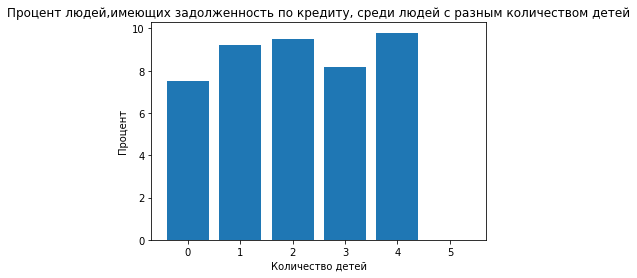

In [24]:
number_of_children = range(len(data['children'].unique()))
percent = data_grouped['percent']
plt.bar(number_of_children, percent)
plt.title('Процент людей,имеющих задолженность по кредиту, среди людей с разным количеством детей')
plt.xlabel('Количество детей')
plt.ylabel('Процент')
None

**Вывод:** 
Мы определили, что наименьший процент заемщиков, у которых ранее была задолженность по кредиту, среди людей с 5 детьми.Но количество респондентов, у которых 5 детей, составляет всего 9 человек, что недостаточно для нашего исследования.
Не беря в учет данную категорию людей, можно сделать вывод, что самый большой процент  людей (9.8%),ранее имевших задолженность по кредиту, среди группы людей с 4 детьми, самый маленький-среди тех, у которых нет детей(7.5%). Таким образом, существует небольшая взаимосвязь между количеством детей и возвратом кредита в срок.

Определим есть ли зависимость между семейным положением и возвратом кредита в срок.

In [25]:
#создадим сводную таблицу,где первый столбец-количество людей с определенным семейным положением, второй-количество людей, ранее 
#ранее имеющих задолженность по кредиту, а в третьем рассчитаем процент в каждой группе

data_grouped1 = data.groupby(['family_status']).agg({'family_status':'count','debt':'sum'})
data_grouped1['percent'] = round(data_grouped1['debt'] / data_grouped1['family_status']*100,1)
print(data_grouped1)

                       family_status  debt  percent
family_status                                      
Не женат / не замужем           2796   273      9.8
в разводе                       1189    84      7.1
вдовец / вдова                   951    63      6.6
гражданский брак                4146   385      9.3
женат / замужем                12266   927      7.6


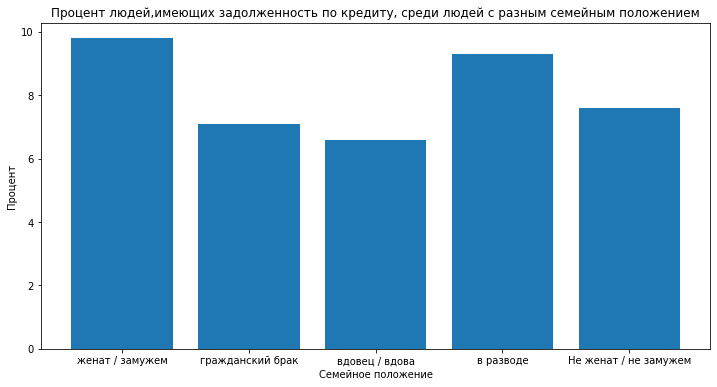

In [26]:
#создадим гистограмму
fig, ax = plt.subplots(figsize=(12, 6))
family_status=data['family_status'].unique()
percent1=data_grouped1['percent']
plt.bar(family_status, percent1)
plt.title('Процент людей,имеющих задолженность по кредиту, среди людей с разным семейным положением')
plt.xlabel('Семейное положение')
plt.ylabel('Процент')
None

**Вывод:** между семейным положением и благонадежностью заемщика также прослеживается связь: самый большой процент людей, имеющих ранее задолженность по кредиту, среди тех, кто не женат и не замужем (9.8%). Самый наименьший среди тех, кто в разводе или овдовел:7.1% и 6.6% соответственно.

Определим есть ли зависимость между уровнем дохода и возвратом кредита в срок.

In [27]:
data_grouped2 = data.groupby(['total_income_category']).agg({'total_income_category':'count','debt':'sum'})
data_grouped2['percent'] = round(data_grouped2['debt'] / data_grouped2['total_income_category']*100,1)
print(data_grouped2)

                       total_income_category  debt  percent
total_income_category                                      
A                                         25     2      8.0
B                                       5014   354      7.1
C                                      15938  1353      8.5
D                                        349    21      6.0
E                                         22     2      9.1


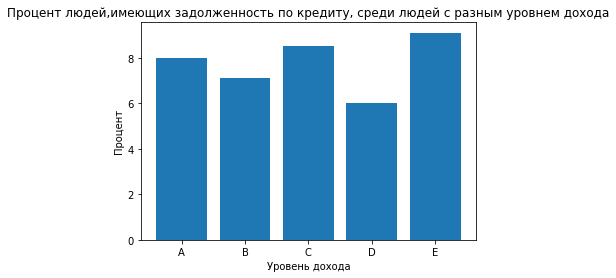

In [28]:
#создадим гистограмму
total_income_category=['A','B','C','D','E']
percent2=data_grouped2['percent']
plt.bar(total_income_category, percent2)
plt.title('Процент людей,имеющих задолженность по кредиту, среди людей с разным уровнем дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Процент')
None

**Вывод:** самый большой процент заемщиков, имевших ранее задолженность, среди тех,чей доход состаляет до 30000. А самые благонадежные-имеют доход от 30000 до 50000. Таким образом, связь между уровнем дохода и риском задолженности есть, но она не линейная.

Узнаем, как разные цели кредита влияют на его возврат.

In [29]:
data_grouped3 = data.groupby(['purpose_category']).agg({'purpose_category':'count','debt':'sum'})
data_grouped3['percent'] = round(data_grouped3['debt'] / data_grouped3['purpose_category']*100,1)
print(data_grouped3)

                          purpose_category  debt  percent
purpose_category                                         
операции с автомобилем                4281   400      9.3
операции с недвижимостью             10754   780      7.3
получение образования                 3989   369      9.3
проведение свадьбы                    2324   183      7.9


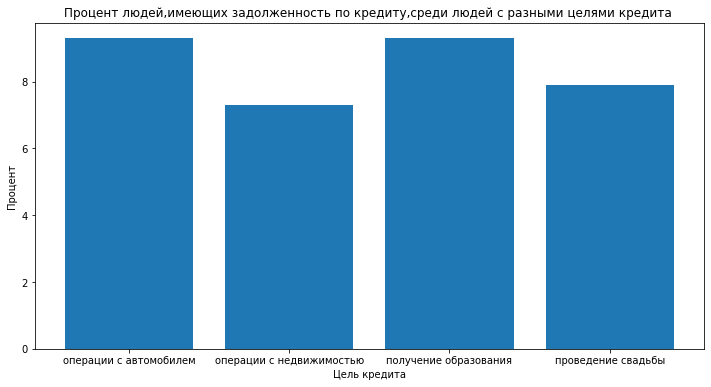

In [30]:
#создадим гистограмму
fig, ax = plt.subplots(figsize=(12, 6))
purpose_category=['операции с автомобилем','операции с недвижимостью','получение образования','проведение свадьбы']
percent3=data_grouped3['percent']
plt.bar(purpose_category, percent3)
plt.title('Процент людей,имеющих задолженность по кредиту,среди людей с разными целями кредита ')
plt.xlabel('Цель кредита')
plt.ylabel('Процент')
None

**Вывод:** среди заемщиков, которые берут кредит для получения образования и покупки автомобиля, больше тех, кто имел ранее задолженности, чем среди тех, кто берет кредит для проведения свадьбы и операций с недвижимостью, примерно на 2%.

## Общий вывод.

В процессе исследования мы нашли небольшую взаимосвязь между возвратом кредита в срок и характеристиками заемщиков: семейным положением, наличием детей, уровнем дохода и целями кредита. При этом разница между благонадежностью разных категорий людей была небольшой: в среднем примерно 2%. Для более точного прогнозирования риска невозврата кредита необходимо учитывать все 4 характеристики одновременно, а также и другие характеристики заемщика, такие как возраст, уровень образования и т.д.